# Ejercicios de Web scraping
En esta práctica vamos a realizar distintos ejercicios sobre captura de contenidos web (web scraping) usando las librerías vistas en clase (`request` y `BeautifulSoup`).

## Parte 1: Captura de datos meteorológicos
En este parte vamos a capturar datos meteorológicos de la Comunitat Valenciana desde la página de la [AVAMET (Associació valenciana de meteorologia)](https://www.avamet.org) con request and BeautifulSoup.

Los datos de todos los municipios de la CV están en una tabla de clase `tDades`

<table class="tDades" style="width: 98% !important;">
<thead class="fixe1">
<tr>
<th rowspan="2" width="35%">Estació</th>
<th colspan="3">Temperatura (°C)</th>
<th>HR (%)</th>
<th rowspan="2" width="10%">Prec. (mm)</th>
<th colspan="3">Vent</th>
</tr>
<tr>
<th width="7%">Mín</th>
<th width="7%">Mit</th>
<th width="7%">Màx</th>
<th width="7%">Mit</th>
<th width="8%">Mit</th>
<th width="8%">Dir</th>
<th width="8%">Màx</th>
</tr>
</thead>
<tr>
<td class="rProvincia" colspan="8">Província de Castelló</td>
</tr>
<tr>
<td class="rComarca" colspan="8">els Ports</td>
</tr>
<tr>
<td class="rEsta"><a class="negre" href="mx-fitxa.php?id=c01m038e20"><img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13"> Castellfort<span class="rEstaDmxo"><span class="ptda"></span>AEMET</span></img></a> </td>
<td class="rValm colornT17">5,2 </td>
<td class="rValm colornT17">5,8 </td>
<td class="rValm colornT18">6,5 </td>
<td class="rVal"> </td>
<td class="rValm colorP00">0,1 </td>
<td 

Dentro de la tabla, los datos están en las filas (`<tr>`) que tienen un elemento`<td class='rEsta'>`. Definimos una función para filtrar etiquetas con esta clase y buscamos todos los elementos internos a la tabla:

753

Nos fijamos por ejemplo en el primer elemento de esta lista:

<tr>
 <td class="rEsta">
  <a class="negre" href="mx-fitxa.php?id=c01m038e20">
   <img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13">
    Castellfort
    <span class="rEstaDmxo">
     <span class="ptda">
     </span>
     AEMET
    </span>
   </img>
  </a>
 </td>
 <td class="rValm colornT17">
  5,2
 </td>
 <td class="rValm colornT17">
  5,8
 </td>
 <td class="rValm colornT18">
  6,5
 </td>
 <td class="rVal">
 </td>
 <td class="rValm colorP00">
  0,1
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
  <b>
  </b>
 </td>
</tr>



Vemos que algunas de las celdas de esta fila tienen elementos de tipo `<span>`. Si no nos interesan los podríamos eliminar con el método `.decompose()` del Tag. Pero como el texto nos interesa insertamos un espacio para separar el contenido al extraer el texto posteriormente con `.text()`:

<tr>
 <td class="rEsta">
  <a class="negre" href="mx-fitxa.php?id=c01m038e20">
   <img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13">
    Castellfort
    <span class="rEstaDmxo">
     <span class="ptda">
     </span>
     AEMET
    </span>
   </img>
  </a>
 </td>
 <td class="rValm colornT17">
  5,2
 </td>
 <td class="rValm colornT17">
  5,8
 </td>
 <td class="rValm colornT18">
  6,5
 </td>
 <td class="rVal">
 </td>
 <td class="rValm colorP00">
  0,1
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
  <b>
  </b>
 </td>
</tr>



['Castellfort AEMET', '5,2', '5,8', '6,5', '', '0,1', '', '', '']

[<td class="rEsta"><a class="negre" href="mx-fitxa.php?id=c01m038e20"><img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13"> Castellfort <span class="rEstaDmxo"><span class="ptda"></span>AEMET</span></img></a> </td>,
 <td class="rValm colornT17">5,2 </td>,
 <td class="rValm colornT17">5,8 </td>,
 <td class="rValm colornT18">6,5 </td>,
 <td class="rVal"> </td>,
 <td class="rValm colorP00">0,1 </td>,
 <td class="rVal"> </td>,
 <td class="rVal"> </td>,
 <td class="rVal"><b> </b></td>]

9

Ahora exportamos la tabla como un DataFrame de `pandas`:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       753 non-null    object
 1   1       753 non-null    object
 2   2       753 non-null    object
 3   3       753 non-null    object
 4   4       753 non-null    object
 5   5       753 non-null    object
 6   6       753 non-null    object
 7   7       753 non-null    object
 8   8       753 non-null    object
dtypes: object(9)
memory usage: 53.1+ KB


,localidad,Temp,Tmax,Tmin,Humedad,Precip,Vel.viento,Dir.viento,Vmax_viento
0,Castellfort AEMET,"5,2","5,8","6,5",,"0,1",,,
1,Cinctorres,"7,8","8,3","9,2",91,"1,0","6,4",ESE,"25,7"
2,Forcall,"9,4","10,2","11,2",88,"0,4","5,8",N,"25,7"
3,la Mata,"8,6","9,1","10,3",89,"0,2","5,6",ESE,"37,0"
4,Morella centre,"7,1","8,0","9,2",94,"0,0","5,8",ENE,"33,8"


### Ejercicio 1
Crea un script para capturar los datos de un territorio y una fecha concretas a través de la URL:\
`https://www.avamet.org/mx-meteoxarxa.php?id={fecha}&territori={territorio}`\
Los códigos de cada territorio están en el elemento `select` siguiente:

<select class="formBasic" name="freg_territori" onchange="location.href='mx-meteoxarxa.php?id=2022-03-16&amp;territori=' + this.value">
<option selected="" style="font-weight:800;" value="pv">TOT EL TERRITORI</option>
<option style="font-weight:800;" value="p12">Prov. Castelló</option>
<option value="c01">   els Ports</option>
<option value="c02">   l′Alt Maestrat</option>
<option value="c03">   el Baix Maestrat</option>
<option value="c04">   l′Alcalatén</option>
<option value="c05">   la Plana Alta</option>
<option value="c06">   la Plana Baixa</option>
<option value="c07">   l′Alt Palància</option>
<option value="c08">   l′Alt Millars</option>
<option style="font-weight:800;" value="p46">Prov. València</option>
<option value="c09">   el Racó d′Ademús</option>
<option value="c10">   la Serrania</option>
<option value="c11">   el Camp de Túria</option>
<option value="c12">   el Camp de Morvedre</option>
<option value="c13">   l′Horta Nord</option>
<option value="c14">   l′Horta Oest</

           Estación Temperatura Máxima Mínima Humedad Precipitación  \
0  CastellfortAEMET         5,2    5,8    6,5                   0,1   
1        Cinctorres         7,8    8,3    9,2      91           1,0   
2           Forcall         9,4   10,2   11,2      88           0,4   
3           la Mata         8,6    9,1   10,3      89           0,2   
4     Morellacentre         7,1    8,0    9,2      94           0,0   

  Velocidad Viento Dirección Viento Viento Máximo  
0                                                  
1              6,4              ESE          25,7  
2              5,8                N          25,7  
3              5,6              ESE          37,0  
4              5,8              ENE          33,8  


### Ejercicio 2:
Captura los datos durante un mes de la estación de 'València Camins al Grau' y representa gráficamente su temperatura media 

Temperatura promedio para ValènciaCamins al Grau en 2024-04: 14.02°C


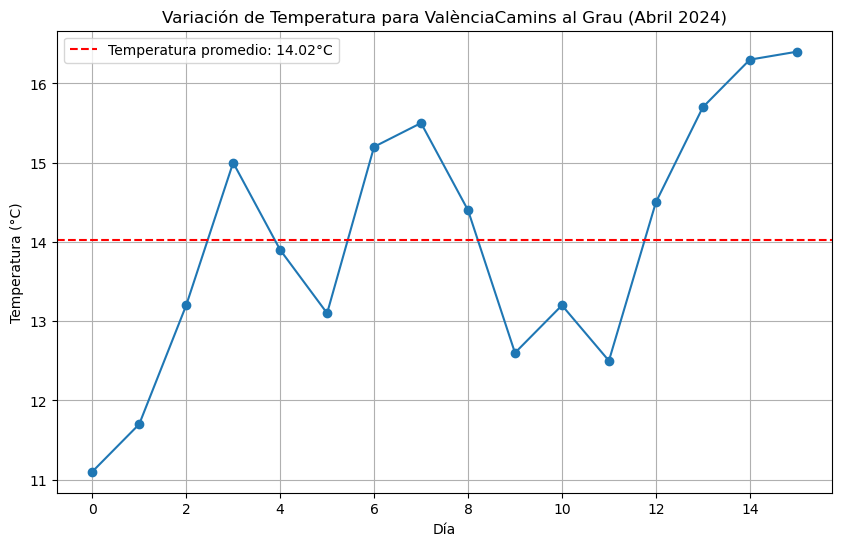

## Parte 2: Datos de la Wikipedia
En esta parte vamos a obtener las URL de las entradas en la wikipedia para todas las provincias de España y vamos a obtener de ellas sus datos básicos en forma de tabla.\
El listado de las provincias de España se puede descargar de la página de la wikipedia siguiente:\
https://es.wikipedia.org/wiki/Provincia_(España) Este ejercicio también se realizará con request y BeautifulSoup.

[<a class="mw-file-description" href="/wiki/Archivo:Flag_of_%C3%81lava.svg"><img class="mw-file-element" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/20px-Flag_of_%C3%81lava.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/30px-Flag_of_%C3%81lava.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/40px-Flag_of_%C3%81lava.svg.png 2x" width="20"/></a>,
 <a href="/wiki/%C3%81lava" title="Álava">Álava</a>]

[<a href="/wiki/%C3%81lava" title="Álava">Álava</a>,
 <a href="/wiki/Provincia_de_Albacete" title="Provincia de Albacete"><b>Albacete</b></a>,
 <a href="/wiki/Provincia_de_Alicante" title="Provincia de Alicante"><b>Alicante</b></a>,
 <a href="/wiki/Provincia_de_Almer%C3%ADa" title="Provincia de Almería"><b>Almería</b></a>,
 <a href="/wiki/Asturias" title="Asturias">Asturias</a>,
 <a href="/wiki/Provincia_de_%C3%81vila" title="Provincia de Ávila"><b>Ávila</b></a>,
 <a href="/wiki/Provincia_de_Badajoz" title="Provincia de Badajoz"><b>Badajoz</b></a>,
 <a href="/wiki/Provincia_de_Barcelona" title="Provincia de Barcelona"><b>Barcelona</b></a>,
 <a href="/wiki/Provincia_de_Burgos" title="Provincia de Burgos"><b>Burgos</b></a>,
 <a href="/wiki/Provincia_de_C%C3%A1ceres" title="Provincia de Cáceres"><b>Cáceres</b></a>,
 <a href="/wiki/Provincia_de_C%C3%A1diz" title="Provincia de Cádiz"><b>Cádiz</b></a>,
 <a href="/wiki/Cantabria" title="Cantabria">Cantabria</a>,
 <a href="/wiki/Provincia_de_C

,provincia,enlace
0,Álava,/wiki/%C3%81lava
1,Provincia de Albacete,/wiki/Provincia_de_Albacete
2,Provincia de Alicante,/wiki/Provincia_de_Alicante
3,Provincia de Almería,/wiki/Provincia_de_Almer%C3%ADa
4,Asturias,/wiki/Asturias
5,Provincia de Ávila,/wiki/Provincia_de_%C3%81vila
6,Provincia de Badajoz,/wiki/Provincia_de_Badajoz
7,Provincia de Barcelona,/wiki/Provincia_de_Barcelona
8,Provincia de Burgos,/wiki/Provincia_de_Burgos
9,Provincia de Cáceres,/wiki/Provincia_de_C%C3%A1ceres


Por ejemplo, creamos la sopa para la primera provincia:

Vamos a extraer en un data frame la información geográfica de la tabla de la barra lateral derecha (atributo de clase `infobox`):

Si inspeccionas su estructura HTML verás una serie de tags `tr` de las que cuelgan pares de tags `th` y `td` asociadas. Capturaremos sus textos en dos listas: `dato` y `valor`, respectivamante.

,Dato,Valor
0,Coordenadas,"42°50′00″N 2°45′00″O ﻿ / ﻿ 42.833333333333, -2.75"
1,Capital,Vitoria
2,Idioma oficial,Español y euskera
3,Entidad,Provincia de España
4,• País,España España
5,• Comunidad,País Vasco País Vasco
6,CongresoSenadoParlamento VascoJuntas Generales...,4 diputados 4 senadores 25 parlamentarios auto...
7,Subdivisiones,7 comarcas 51 municipios
8,Fundación,División territorial de 1833
9,Superficie,Puesto 48.º


### Ejercicio 3
Crea una tabla (dataframe) con la capital, la superficie y la población de cada provincia de España.\
Para encontrar en la tabla estos datos podemos hacer:

'\nVitoria'

'\xa0• Total\n3037 km²\xa0(0,60\xa0%)'

'\xa0• Total\n334\xa0412\xa0hab.\xa0(0,70\xa0%)'

Tendrás que usar expresiones regulares para extraer de estos strings el texto buscado.

                              Provincia  \
0                                 Álava   
1                 Provincia de Albacete   
2                 Provincia de Alicante   
3                  Provincia de Almería   
4                              Asturias   
5                    Provincia de Ávila   
6                  Provincia de Badajoz   
7                Provincia de Barcelona   
8                   Provincia de Burgos   
9                  Provincia de Cáceres   
10                   Provincia de Cádiz   
11                            Cantabria   
12               Provincia de Castellón   
13             Provincia de Ciudad Real   
14        Provincia de Córdoba (España)   
15               Provincia de La Coruña   
16                  Provincia de Cuenca   
17                  Provincia de Gerona   
18                 Provincia de Granada   
19             Provincia de Guadalajara   
20                            Guipúzcoa   
21                  Provincia de Huelva   
22         